# Лабораторная работа №6
## Численное решение системы ДУ
#### В работе численно решается однородное дифференциальное уравнение, представленное в виде системы, методом Рунге-Кутты 4 порядка и многошаговым методом Адамса 2 порядка 
#### В качестве примера решено упражнение VIII.11.2 сборника Аристовой и Лобанова:

$$y'' + \varepsilon (y^2 - 1) y' + y = 0$$

#### Уравнение Ван-дер-Поля можно представить в виде системы (представление Льенара):
$$
	\begin{cases}
		x' = z, \\
        z' = \varepsilon(1-x^2)z - x
    \end{cases}
$$

#### Начальные условия:
$$x(0) = 2, ~~ z(0) = 0$$

#### Параметр уравнения: $\varepsilon$ выбран '0.01' для метода Рунге-Кутты '1' для метода Адамса.
#### Графики решения представлены ниже.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsilon_Kutta = 0.01
epsilon_Adams = 1
x_0 = 2
z_0 = 0
step = 0.01

def FuncKutta(y, epsilon=epsilon_Kutta):
    return np.array([y[1], epsilon * (1 - y[0] ** 2) * y[1] - y[0]])

def FuncAdams(y, epsilon=epsilon_Adams):
    return np.array([y[1], epsilon * (1 - y[0] ** 2) * y[1] - y[0]])

In [3]:
def RungeKuttaMethod(epsilon=epsilon_Kutta):
    y = np.array([x_0, z_0])
    t = np.arange(0, 100, step)
    y_kutta = np.array([[]]).reshape(-1, 2)

    for tau in t:
        k_1 = FuncKutta(y, epsilon) * step
        k_2 = FuncKutta(y + k_1 / 2, epsilon) * step
        k_3 = FuncKutta(y - k_1 + 2 * k_2, epsilon) * step
        delta_y = (k_1 + 4 * k_2 + k_3) / 6
        y = y + delta_y
        y_kutta = np.append(y_kutta, [y], axis=0)

    return y_kutta

def AdamsMethod():
    t = np.arange(0, 100, step)
    y_adams = RungeKuttaMethod(epsilon_Adams)

    for i in range(2, len(t)):
        k_1 = FuncAdams(y_adams[i]) * step
        k_2 = FuncAdams(y_adams[i - 1]) * step
        k_3 = FuncAdams(y_adams[i - 2]) * step
        delta_y = (23 * k_1 - 16 * k_2 + 5 * k_3) / 6
        y_adams[i] = y_adams[i] + delta_y

    return y_adams


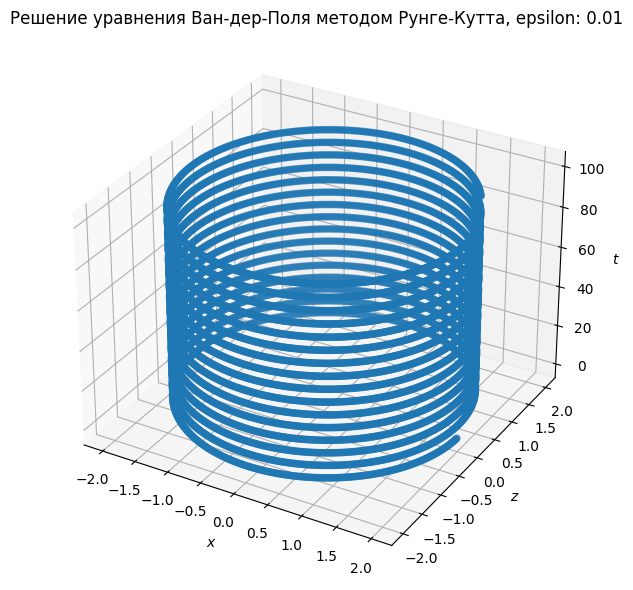

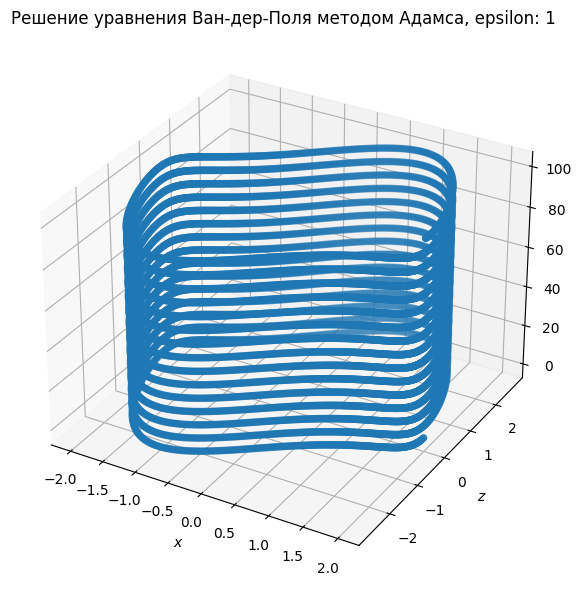

In [4]:
def PlotGraph(y, str):
    plt.figure(figsize = (6,6))
    plt.tight_layout()
    ax = plt.axes(projection = '3d')

    ax.set_title(r"Решение уравнения Ван-дер-Поля " + str)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$z$")
    ax.set_zlabel(r"$t$");

    t = np.arange(0, 100, step)
    ax.scatter3D(y[:,0], y[:,1], t)

    plt.tight_layout()

def main():
    y_kutta = RungeKuttaMethod()
    PlotGraph(y_kutta, "методом Рунге-Кутта, epsilon: " + str(epsilon_Kutta))
    y_adams = AdamsMethod()
    PlotGraph(y_adams, "методом Адамса, epsilon: " + str(epsilon_Adams))

main()